## Exercise 1: GD on a 1D Function

Consider the 1-dimensional function

$$
\mathcal{L}(\Theta)  = (\Theta - 3)^2 + 1.
$$


1. **Compute the Gradient** of $\mathcal{L}(\Theta)$ explicitly.

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def l(theta):
    return (theta - 3) **2 + 1

def grad_l(theta):
    return 2 * (theta - 3)

2. **Implement the Gradient Descent** to optimize $\mathcal{L}(\Theta)$ following what we introduced on the theoretical sections.


In [28]:
def GD(l, grad_l, theta_0, eta, maxit):

    theta_vals = [theta_0]
    for k in range(maxit):
        theta = theta_0 - eta * grad_l(theta_0)
        theta_0 = theta

        theta_vals.append(theta)

    return theta, np.array(theta_vals)

3. Test three different constant step sizes:
   - $\eta = 0.05$  
   - $\eta = 0.2$
   - $\eta = 1.0$

In [48]:
sp = 0

theta_005, traj_005 = GD(l, grad_l, theta_0 = sp, eta = 0.05, maxit = 100)
theta_02, traj_02 = GD(l, grad_l, theta_0 = sp, eta = 0.2, maxit = 100)
theta_1, traj_1 = GD(l, grad_l, theta_0 = sp, eta = 1, maxit = 100)

etas = [0.05, 0.2, 1.0]



4. For each choice:
   - Plot the sequence $\Theta^{(k)}$ on the real line (i.e. draw a line and represent, on top of it, the position of all the successive elements $\Theta^{(k)}$).  
   - Plot the function values $\mathcal{L}(\Theta^{(k)})$ vs iteration.  
   - Comment on convergence, oscillations, and divergence.

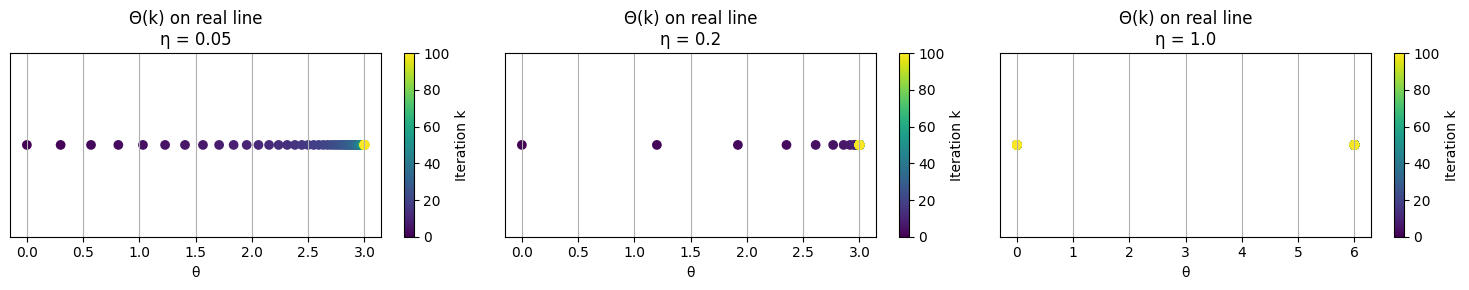

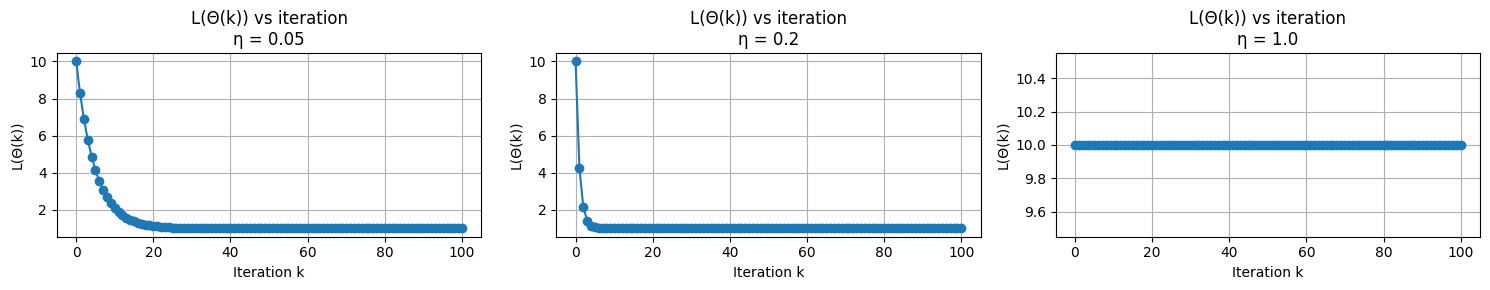

In [49]:
trajectories = {
    0.05: traj_005,
    0.2: traj_02,
    1.0: traj_1
}

fig, axes = plt.subplots(1, 3, figsize=(15, 3))
for i, (eta, thetas) in enumerate(trajectories.items()):
    ax = axes[i]
    sc = ax.scatter(thetas, np.zeros_like(thetas), c=range(len(thetas)), cmap='viridis')
    ax.set_title(f"Θ(k) on real line\nη = {eta}")
    ax.set_xlabel("θ")
    ax.set_yticks([])
    ax.grid(True)
    fig.colorbar(sc, ax=ax, label='Iteration k')

plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 3, figsize=(15, 3))
for i, (eta, thetas) in enumerate(trajectories.items()):
    ax = axes[i]
    L_vals = l(thetas)
    ax.plot(L_vals, marker='o')
    ax.set_title(f"L(Θ(k)) vs iteration\nη = {eta}")
    ax.set_xlabel("Iteration k")
    ax.set_ylabel("L(Θ(k))")
    ax.grid(True)

plt.tight_layout()
plt.show()

With n = 0.05, the convergence is slow but stable, the updates are small, the function values decrease steadily, gradient descent converges to the minimum without oscillations.

With n = 0.2, the convergence is faster and still stable, the updates are larger, the function values decrease more rapidly, gradient descent converges to the minimum without oscillations.

With n = 1.0, the step size is TOO LARGE, the function values oscillate significantly, gradient descent diverges and does not converge to the minimum.

5. Relate your observations to the discussion in class about:
   - step-size being too small / too large,
   - the role of convexity,
   - how the “just right” step size leads to fast convergence.

*Hint:* This function is strictly convex with a unique minimizer at $\Theta^* = 3$.


The results show the behaviour of gradient descent on a convex function.

If the step size is too small, convergence is slow, the GD algorithm needs more iterations to reach the minimum.

If the step size is too large, the algorithm diverges, oscillating around the minimum without converging.

Since the function is strictly convex, it has a single global minimum at $\Theta^* = 3$, so the convergence depends only on the step size, not on the initial point. Of course, starting closer to the minimum would reduce the number of iterations needed to converge.

With an intermediate step size, convergence is fast and stable, reaching the minimum in fewer iterations.



## Exercise 2: Backtracking Line Search

Consider the non-convex function

$$
\mathcal{L}(\Theta)  = \Theta^4 - 3\Theta^2 + 2.
$$

1. Implement **Gradient Descent with Backtracking**, using the Armijo condition, considering the `backtracking(...)` function from class.
